# Linear Algebra Assignment

## Question 1
Using auto-mpg data, find the top 5 similar cars to toyota corona mark ii

In [18]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


df = pd.read_csv('auto-mpg (1).csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [49]:
toyota_corona_mark = df[df['car name'] == 'toyota corona mark ii'].select_dtypes(include=np.number).dropna().iloc[0]
toyota_corona_mark

mpg               24.0
cylinders          4.0
displacement     113.0
weight          2372.0
acceleration      15.0
model year        70.0
origin             3.0
Name: 14, dtype: float64

In [4]:
other_cars = df[df['car name'] != 'toyota corona mark ii'].select_dtypes(include=np.number).dropna()
other_cars

,mpg,cylinders,displacement,weight,acceleration,model year,origin
0,18.0,8,307.0,3504,12.0,70,1
1,15.0,8,350.0,3693,11.5,70,1
2,18.0,8,318.0,3436,11.0,70,1
3,16.0,8,304.0,3433,12.0,70,1
4,17.0,8,302.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,27.0,4,140.0,2790,15.6,82,1
394,44.0,4,97.0,2130,24.6,82,2
395,32.0,4,135.0,2295,11.6,82,1
396,28.0,4,120.0,2625,18.6,82,1


In [5]:
dot_products = other_cars.apply(lambda row: np.dot(row, toyota_corona_mark), axis=1)
dot_products

0      8351726.0
1      8804813.5
2      8191658.0
3      8182927.0
4      8220654.5
         ...    
393    6640341.0
394    5070508.0
395    5465696.0
396    6246770.0
397    6472081.0
Length: 397, dtype: float64

In [9]:
most_similar_cars_indices = dot_products.nlargest(5).index
most_similar_cars = df.loc[most_similar_cars_indices][['car name']]
print("The most five similar cars are: \n \n", most_similar_cars)

The most five similar cars are: 
 
                      car name
44        pontiac safari (sw)
103          chevrolet impala
42          dodge monaco (sw)
95   buick electra 225 custom
90   mercury marquis brougham


## Question 2
Find completely unique/orthogonal car to toyota corona mark ii

In [13]:
def cosine_similarity(vec1, vec2):
  dot_product = np.dot(vec1, vec2)
  norm_vec1 = np.linalg.norm(vec1)
  norm_vec2 = np.linalg.norm(vec2)
  if norm_vec1 == 0 or norm_vec2 == 0:
    return 0
  return dot_product / (norm_vec1 * norm_vec2)

similarities = other_cars.apply(lambda row: cosine_similarity(row, toyota_corona_mark), axis=1)
similarities

0      0.999146
1      0.998821
2      0.998943
3      0.999110
4      0.999149
         ...   
393    0.999996
394    0.999889
395    0.999910
396    0.999996
397    0.999991
Length: 397, dtype: float64

In [20]:
least_similar_car_index = similarities.nsmallest(1).index[0]
least_similar_car = df.loc[least_similar_car_index][['car name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
print("the least similar car is: \n \n", least_similar_car)

the least similar car is: 
 
 car name        buick estate wagon (sw)
mpg                                14.0
cylinders                             8
displacement                      455.0
horsepower                          225
weight                             3086
acceleration                       10.0
model year                           70
origin                                1
Name: 13, dtype: object


### Question 3
Project the data to a 2-dimentional space and visualize using scatter plot

Scatter plot of the 2D projected data saved as 'pca_scatter_plot.png'




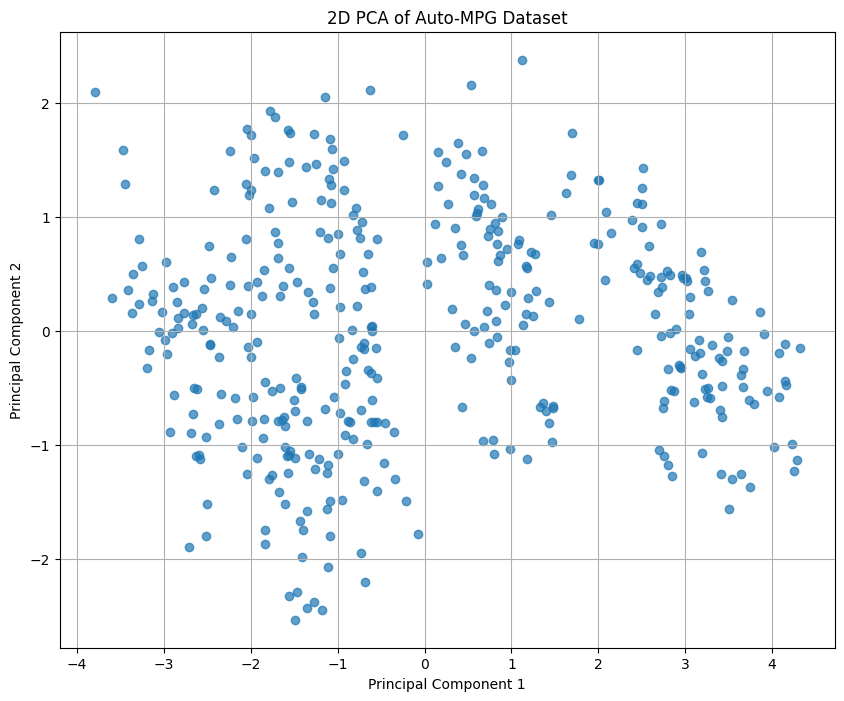

In [22]:
features = df.select_dtypes(include=np.number).dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Auto-MPG Dataset')
plt.grid(True)
plt.savefig('pca_scatter_plot.png')
print("Scatter plot of the 2D projected data saved as 'pca_scatter_plot.png'")
print("\n")


### Question 4
Write a function that returns dot product of two list of numbers

In [29]:
# Your code here
def your_function_21(l1, l2):
    dot_products = np.dot(l1, l2)
    print("np.dot=", dot_products)
    pass

def manual_dotproduct(l1, l2):
    dot = sum(x*y for x, y in zip(l1, l2))
    print("manual dot product=", dot)



l1 = [1, 4, 3, 4, 5]
l2 = [6, 7, 8, 2, 1]
your_function_21(l1, l2)
manual_dotproduct(l1, l2)

np.dot= 71
manual dot product= 71


### Question 5
Write a function that returns the projection of vector a onto vector b. Both a and b are given as list of numbers


- Operations on vectors
    - Projection of a vector $a$ into vector $b$ 
    - $d = \frac{a \cdot b}{\Vert b \Vert} = \frac{\Vert a \Vert \Vert b \Vert \cos \theta}{\Vert b \Vert} = \Vert a \Vert \cos \theta$

In [39]:
# Your code here
def your_function_22(l1, l2):
    projection = np.dot(l1, l2) / np.linalg.norm(l2)
    print("projectio=", projection)
    pass

def manual_projection(l1, l2):
    dot = sum(x*y for x, y in zip(l1, l2))
    norm_l2 = np.linalg.norm(l2)
    projection = dot / norm_l2
    print("manual projection=", projection)

l1 = [1, 4, 3, 4, 5]
l2 = [6, 7, 8, 2, 1]

your_function_22(l1, l2)
manual_projection(l1, l2)

projectio= 5.7213430445802
manual projection= 5.7213430445802


### Question 6
Create a class Vector that supports addition, dot product, and magnitude.

In [ ]:
class Vector:
    def dot(l1, l2):
        sum =(l1*l2 for x, y in zip(l1, l2))
        print("Dot product=", sum)
        pass
    
    def projection(l1, l2):
        projection = np.dot(l1, l2) / np.linalg.norm(l2)
        print("Projection=", projection)
        pass

    def norm(l1, l2):
        norm_l1 = np.linalg.norm(l1)
        norm_l2 = np.linalg.norm(l2)

        print("norm of l1=", norm_l1)
        print("norm of l2=", norm_l2)
        pass

    def magnitude(l1, l2):
        magnitude_l1 = np.linalg.norm(l1)
        magnitude_l2 = np.linalg.norm(l2)
        print("Magnitude of l1=", magnitude_l1)
        print("Magnitude of l2=", magnitude_l2)
        pass


In [45]:
l1 = [1, 4, 3, 4, 5]
l2 = [6, 7, 8, 2, 1]


Vector.dot(l1, l2)
Vector.projection(l1, l2)
Vector.norm(l1, l2)
Vector.magnitude(l1, l2)

Dot product= <generator object Vector.dot.<locals>.<genexpr> at 0x70e8b158ea40>
Projection= 5.7213430445802
norm of l1= 8.18535277187245
norm of l2= 12.409673645990857
Magnitude of l1= 8.18535277187245
Magnitude of l2= 12.409673645990857


### Question 7
Write a function that returns the L1 and L2 norms of a vector given as list

In [41]:
def your_function_28(l1, l2):
    projection = np.dot(l1, l2) / np.linalg.norm(l2)
    print("projection=", projection)    
    pass

def manual_norms(l1, l2):
    norm_l1 = np.linalg.norm(l1)
    norm_l2 = np.linalg.norm(l2)

    print("norm of l1=", norm_l1)
    print("norm of l2=", norm_l2)
    pass

l1 = [1, 4, 3, 4, 5]
l2 = [6, 7, 8, 2, 1]

manual_norms(l1, l2)


norm of l1= 8.18535277187245
norm of l2= 12.409673645990857
